##### Modeling


In [1]:
# to import data 
import pandas as pd
clean_data = pd.read_csv('../Pre-processing/coffee_data_converted_cleaned_dummy_scaled_train.csv')
clean_data.head()

clean_data.isnull().sum()

title                         0
roaster                       0
score                         0
Roaster Location              0
Review Date                   0
Aroma                         0
Acidity/Structure           142
Body                          0
Flavor                        0
Aftertaste                    0
coffee_name                   0
region_africa_arabia          0
region_caribbean              0
region_central_america        0
region_hawaii                 0
region_asia_pacific           0
is_blend                      0
Est. Price USD                0
Latitude                      0
Longitude                     0
January_Avg_Temp              0
January_Precipitation         0
July_Avg_Temp                 0
July_Precipitation            0
Est. Price USD_per_ounce      0
whole-bean_Agtron             0
ground-bean_Agtron            0
Roast Level_Dark              0
Roast Level_Light             0
Roast Level_Medium            0
Roast Level_Medium-Dark       0
Roast Le

There are still some null values in the dataset, so decide to drop them.

In [2]:
# remove null values in Acidty/Structure
clean_data = clean_data.dropna(subset=['Acidity/Structure'])
clean_data.isnull().sum()

# remove null values in Aroma
clean_data = clean_data.dropna(subset=['Aroma'])
clean_data.isnull().sum()

title                       0
roaster                     0
score                       0
Roaster Location            0
Review Date                 0
Aroma                       0
Acidity/Structure           0
Body                        0
Flavor                      0
Aftertaste                  0
coffee_name                 0
region_africa_arabia        0
region_caribbean            0
region_central_america      0
region_hawaii               0
region_asia_pacific         0
is_blend                    0
Est. Price USD              0
Latitude                    0
Longitude                   0
January_Avg_Temp            0
January_Precipitation       0
July_Avg_Temp               0
July_Precipitation          0
Est. Price USD_per_ounce    0
whole-bean_Agtron           0
ground-bean_Agtron          0
Roast Level_Dark            0
Roast Level_Light           0
Roast Level_Medium          0
Roast Level_Medium-Dark     0
Roast Level_Medium-Light    0
dtype: int64

In [3]:
# split data into train and test dataset
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# define target variable
y = clean_data['score']

# define features
X = clean_data.drop(columns=['score', 'title', 'roaster', 'Roaster Location', 'Review Date', 'coffee_name', 'Est. Price USD'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)




##### Model option: Linear Regression

In [4]:
# Linear Regression



model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# to see the Linear Regression model performance
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

#
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# 計算 R2-score
r2_score = r2_score(y_test, y_pred)
print(f"R2-score: {r2_score}")


MSE: 0.008814757840222932
R2-score: 0.9956168182783834


In [6]:
from sklearn.model_selection import cross_val_score

# 5 fold cross validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation R2:", cv_scores)
print("Average R2:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross Validation R2: [0.99039955 0.99771346 0.99808877 0.99813696 0.99803103]
Average R2: 0.996473953769723
Standard Deviation: 0.0030408060067931885


In [7]:
from sklearn.metrics import mean_squared_error, r2_score as r2_score_metric  # 重命名避免衝突
from sklearn.linear_model import Ridge, Lasso

# Ridge 回歸
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print("Ridge R2:", r2_score_metric(y_test, ridge_pred))


Ridge R2: 0.9956515359415603


In [8]:
y_test


1338    93
965     95
600     94
379     92
448     93
        ..
393     90
1227    93
553     95
281     94
317     96
Name: score, Length: 442, dtype: int64

In [9]:
y_pred

array([93.0344582 , 94.97949447, 94.01087085, 91.99985504, 92.99972222,
       93.01688287, 93.9961299 , 94.00982928, 91.02136204, 90.9846194 ,
       90.97183816, 95.00262218, 92.98685686, 91.97683035, 91.98979797,
       90.97780932, 93.99163433, 95.96083946, 93.00547105, 95.97816912,
       96.97775306, 92.98484464, 92.99814612, 93.99840776, 90.97894055,
       92.99175675, 91.969147  , 93.00236098, 93.98738492, 92.99875442,
       94.97885898, 94.98110134, 92.00520885, 93.99447341, 94.98333487,
       94.00616979, 94.98399109, 93.02026577, 92.97806403, 91.99184397,
       94.02402107, 92.97370198, 95.99336721, 94.98677011, 92.99286854,
       93.00611173, 93.00241712, 92.99933677, 94.9959556 , 94.99408963,
       94.01702164, 94.01086754, 97.01070704, 94.00414343, 91.01188563,
       91.98357576, 93.01751182, 91.9691423 , 92.03371435, 94.01256555,
       92.99490498, 94.98162913, 94.98692812, 92.00901935, 90.9767557 ,
       92.00914943, 93.99777655, 92.01846315, 93.99579439, 94.01

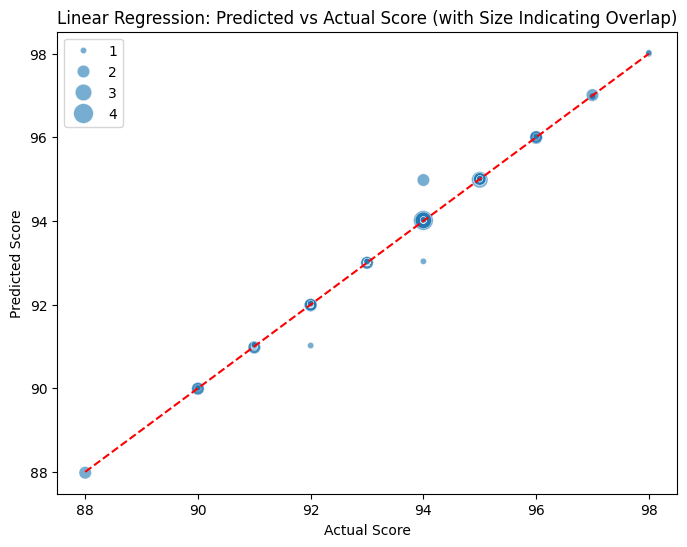

In [10]:
# to see the Linear Regression model performance by scatter plot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# calculate the number of points in the scatter plot
unique_points, counts = np.unique(list(zip(y_test, y_pred)), axis=0, return_counts=True)

# plot the scatter plot, use `size` to represent the number of points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=unique_points[:, 0], y=unique_points[:, 1], size=counts, sizes=(20, 200), alpha=0.6)

# reference line (ideal situation is y_pred = y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Linear Regression: Predicted vs Actual Score (with Size Indicating Overlap)")

plt.show()


plt.show()

##### Model option: Decision Tree Regressor

In [11]:
# DesionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2_score_metric

# create the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

dt_model.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=10, random_state=42)

In [12]:

# predict the test set
y_pred_dt = dt_model.predict(X_test)

# calculate the MSE, R2-score
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score_metric(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R2-score: {r2_dt}")


Decision Tree MSE: 0.12895927601809956
Decision Tree R2-score: 0.9358743652722807


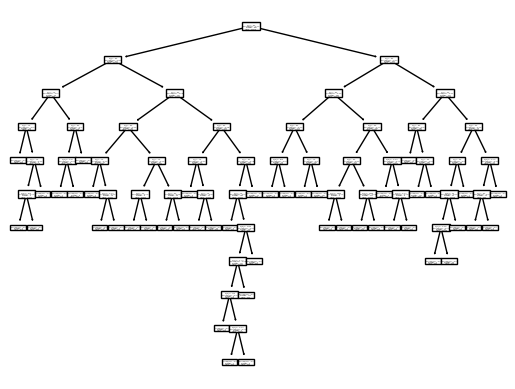

In [13]:
import sklearn
from sklearn import tree
sklearn.tree.plot_tree(dt_model)
plt.show()


##### Model option: XGBoost

In [14]:
#!pip install xgboost

In [15]:
# XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# to specify multiple scoring metrics (r2 and mse)
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error'
}

grid_search = GridSearchCV(
    XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    param_grid,
    cv=5,
    scoring=scoring,
    refit='r2'  # use r2 score to select the best model
)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)




{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.990990838938048


##### Model option: MLP(Multi-Layer Perceptron Regression)

In [16]:
# MLP
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'learning_rate_init': [0.001, 0.01],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(
    MLPRegressor(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='r2'
)


grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)





{'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
0.45479328281558323
